In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from gsd_utils import papermode

papermode(plt=plt)

In [2]:
results_dir = Path("results")
phase1 = results_dir / "phase1"


def numerical(s: pd.Series):
    return pd.to_numeric(s, errors="coerce").fillna(0)

In [3]:
df = pd.read_csv(phase1 / "phase1-results-excel.csv", index_col="Experiment")
experiments = [
    "Base",
    "Filtered",
    "Augm0",
    "Augm1",
    "Augm2",
    "Augm3",
    "Augm4",
    "Augm5",
    "Rebalance1",
    "Rebalance2",
    "Background",
    "Final",
]
df = (
    df.loc[experiments, :]
    .reset_index()
    .rename(
        columns={
            "test_mIOU": "test_mIoU",
            "test_pacc": "test_pAcc",
            "val_mIOU": "val_mIoU",
            "val_pacc": "val_pAcc",
        }
    )
)

dronetest_df = pd.read_csv(phase1 / "test/phase1-test-avg.csv")
df["exp_idx"] = dronetest_df.Experiment.str.lstrip("experiment ").apply(
    pd.to_numeric,
    errors="coerce",
)
df["test_mIoU"] = dronetest_df.mIoU
df["test_pAcc"] = dronetest_df.pAcc
df["test_f1"] = dronetest_df.F1

droneval_df = pd.read_csv(phase1 / "val/phase1-val-avg.csv")
df["val_mIoU"] = droneval_df.mIoU
df["val_pAcc"] = droneval_df.pAcc
df["val_f1"] = droneval_df.F1

df.to_csv(phase1 / "phase1-metrics.csv", index_label=None)

In [4]:
df.head()

,Experiment,val_avgfoldacc,val_mIoU,val_pAcc,val_f1,test_mIoU,test_pAcc,test_f1,exp_idx
0,Base,0.95796,0.2271,0.4022,0.2923,0.1702,0.3504,0.2283,0
1,Filtered,0.97892,0.2339,0.4208,0.2972,0.1725,0.3306,0.2303,1
2,Augm0,0.97130,0.2717,0.5082,0.3442,0.2196,0.4217,0.2937,20
3,Augm1,0.96800,0.2648,0.4929,0.3344,0.2111,0.4104,0.2826,21
4,Augm2,0.96534,0.2753,0.5107,0.3469,0.2153,0.4228,0.2869,22


Text(0.5, 0, 'Experiment')

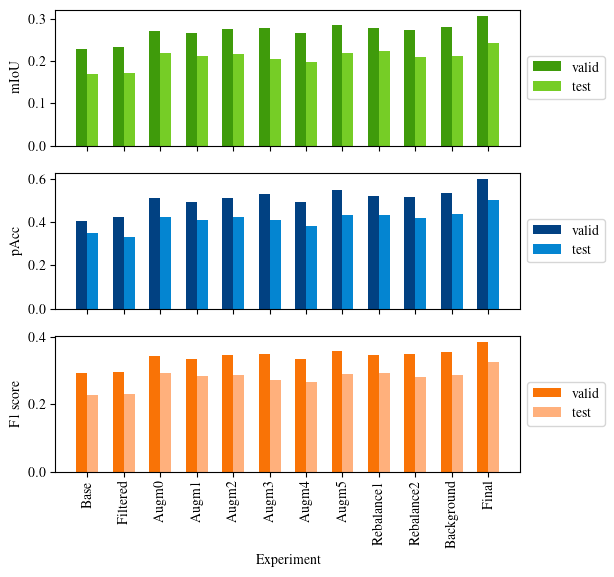

In [8]:
bar_width = 0.3
labels = df.Experiment.values.tolist()

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
x1 = np.arange(len(labels))
x2 = x1 + bar_width

axs[0].bar(x1, numerical(df.val_mIoU), width=bar_width, color="xkcd:grass green", label="valid")
axs[0].bar(x2, numerical(df.test_mIoU), width=bar_width, color="xkcd:apple green", label="test")
axs[0].set_ylabel("mIoU")
axs[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))

axs[1].bar(x1, numerical(df.val_pAcc), width=bar_width, color="xkcd:darkish blue", label="valid")
axs[1].bar(x2, numerical(df.test_pAcc), width=bar_width, color="xkcd:cerulean", label="test")
axs[1].set_ylabel("pAcc")
axs[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

axs[2].bar(x1, numerical(df.val_f1), width=bar_width, color="xkcd:orange", label="valid")
axs[2].bar(x2, numerical(df.test_f1), width=bar_width, color="xkcd:peach", label="test")
axs[2].set_ylabel("F1 score")
axs[2].legend(loc="center left", bbox_to_anchor=(1, 0.5))

axs[2].set_xticks(x1+(bar_width/2), labels, rotation=90)
axs[2].set_xlabel("Experiment")



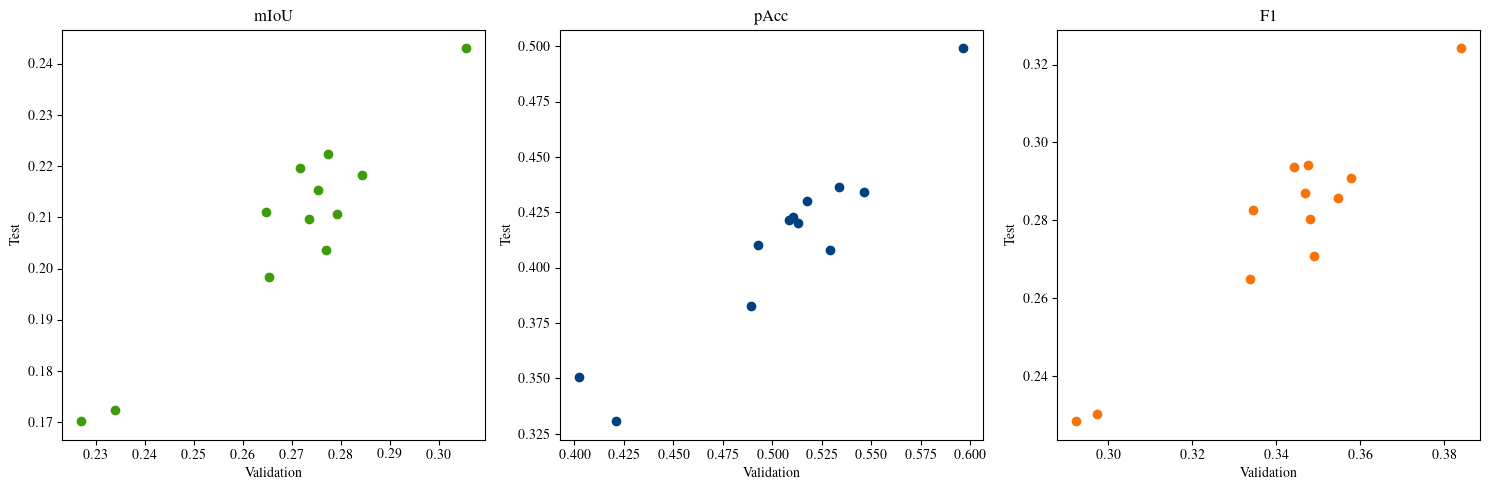

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))

axs[0].scatter(numerical(df.val_mIoU), numerical(df.test_mIoU), color="xkcd:grass green")
axs[0].set_xlabel("Validation")
axs[0].set_ylabel("Test")
axs[0].set_title("mIoU")

axs[1].scatter(numerical(df.val_pAcc), numerical(df.test_pAcc), color="xkcd:darkish blue")
axs[1].set_xlabel("Validation")
axs[1].set_ylabel("Test")
axs[1].set_title("pAcc")

axs[2].scatter(numerical(df.val_f1), numerical(df.test_f1), color="xkcd:orange")
axs[2].set_xlabel("Validation")
axs[2].set_ylabel("Test")
axs[2].set_title("F1")

fig.tight_layout()


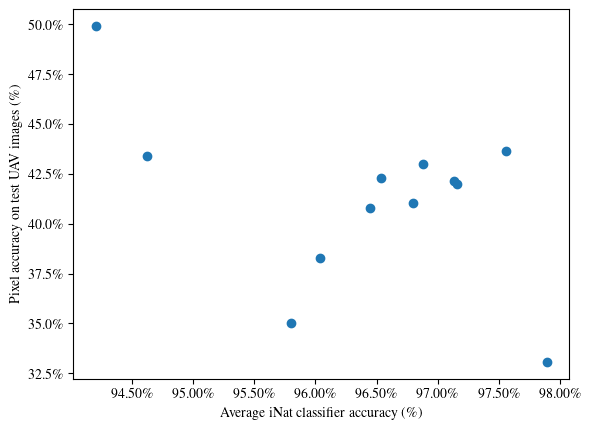

In [7]:
df.head()
fig, ax = plt.subplots()
ax.scatter(df.val_avgfoldacc, df.test_pAcc)
ax.set_xlabel("Average iNat classifier accuracy (\%)")
ax.set_ylabel("Pixel accuracy on test UAV images (\%)")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

